Data Collection

For demonstration purposes, let's create some synthetic data.

In [1]:
import pandas as pd
import numpy as np

# Generate synthetic data
np.random.seed(0)
data = {
    'student_id': np.arange(1, 101),
    'hours_studied': np.random.randint(1, 20, 100),
    'previous_scores': np.random.randint(50, 100, 100),
    'current_score': np.random.randint(50, 100, 100)
}

df = pd.DataFrame(data)
df.to_csv('student_data.csv', index=False)

In [2]:
df.head()

,student_id,hours_studied,previous_scores,current_score
0,1,13,93,72
1,2,16,73,55
2,3,1,52,73
3,4,4,84,93
4,5,4,85,82


Basic Visualizations

Use Matplotlib and Seaborn for visualizations.

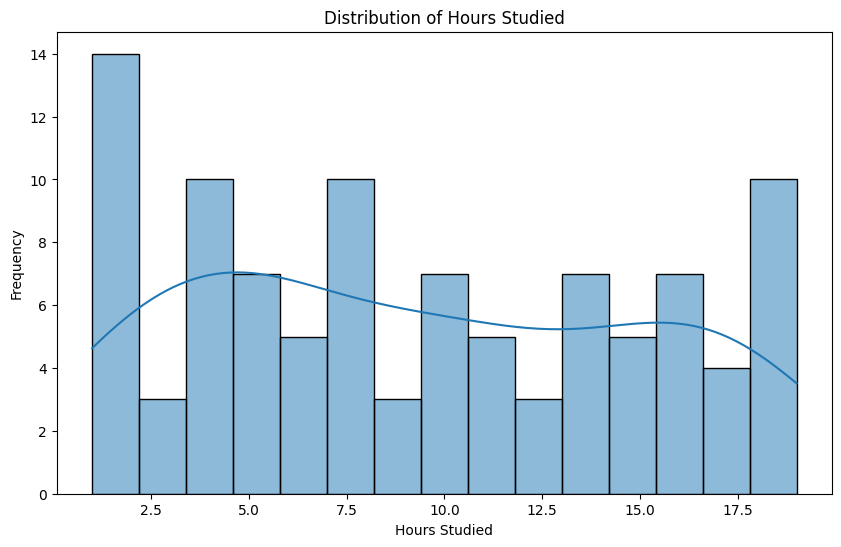

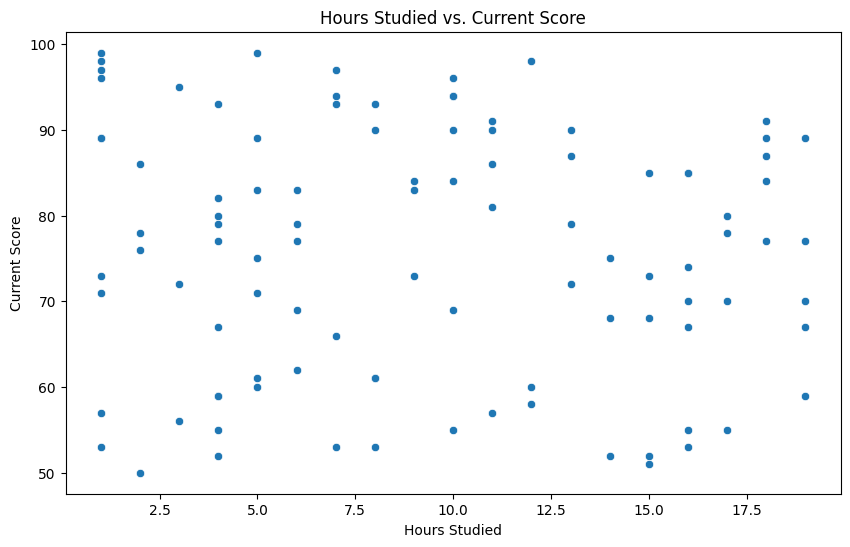

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('student_data.csv')

# Histogram of hours studied
plt.figure(figsize=(10, 6))
sns.histplot(df['hours_studied'], bins=15, kde=True)
plt.title('Distribution of Hours Studied')
plt.xlabel('Hours Studied')
plt.ylabel('Frequency')
plt.show()

# Scatter plot of hours studied vs. current score
plt.figure(figsize=(10, 6))
sns.scatterplot(x='hours_studied', y='current_score', data=df)
plt.title('Hours Studied vs. Current Score')
plt.xlabel('Hours Studied')
plt.ylabel('Current Score')
plt.show()

Exploratory Data Analysis (EDA)

Perform basic EDA to understand the data.

       student_id  hours_studied  previous_scores  current_score
count  100.000000     100.000000       100.000000     100.000000
mean    50.500000       9.290000        74.220000      75.640000
std     29.011492       5.724826        14.373503      14.399439
min      1.000000       1.000000        50.000000      50.000000
25%     25.750000       4.000000        63.000000      61.750000
50%     50.500000       9.000000        74.000000      77.000000
75%     75.250000      15.000000        86.500000      89.000000
max    100.000000      19.000000        98.000000      99.000000


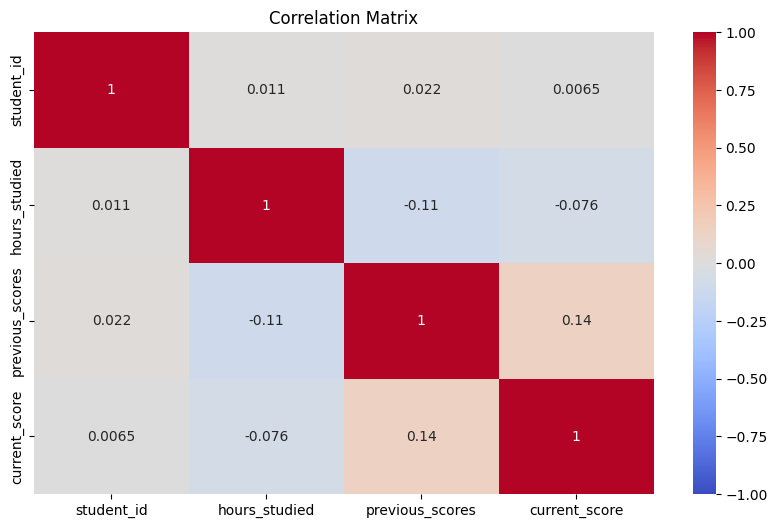

In [4]:
# Summary statistics
print(df.describe())

# Correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

Machine Learning Modelling

Develop a simple ML model to predict current scores based on hours studied and previous scores.

Linear Regression - Mean Squared Error: 240.89
Linear Regression - R-squared: -0.27


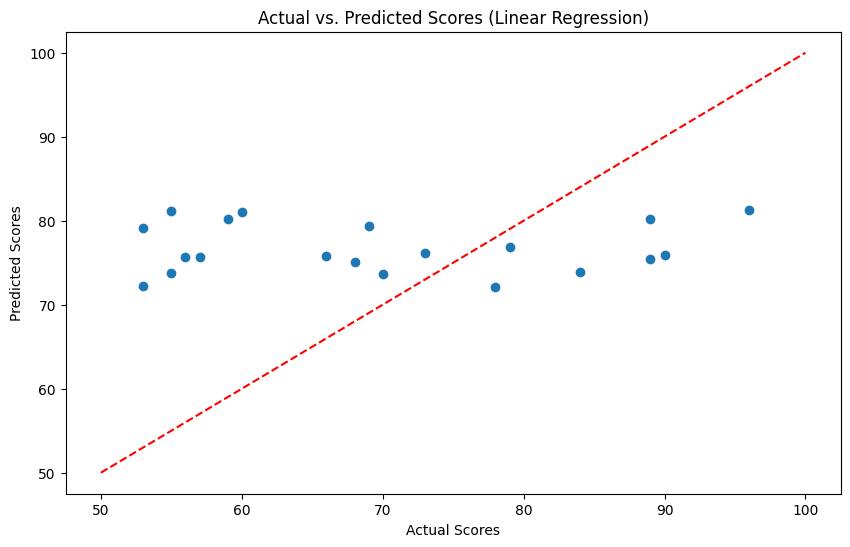

Decision Tree Regressor - Mean Squared Error: 505.52
Decision Tree Regressor - R-squared: -1.67


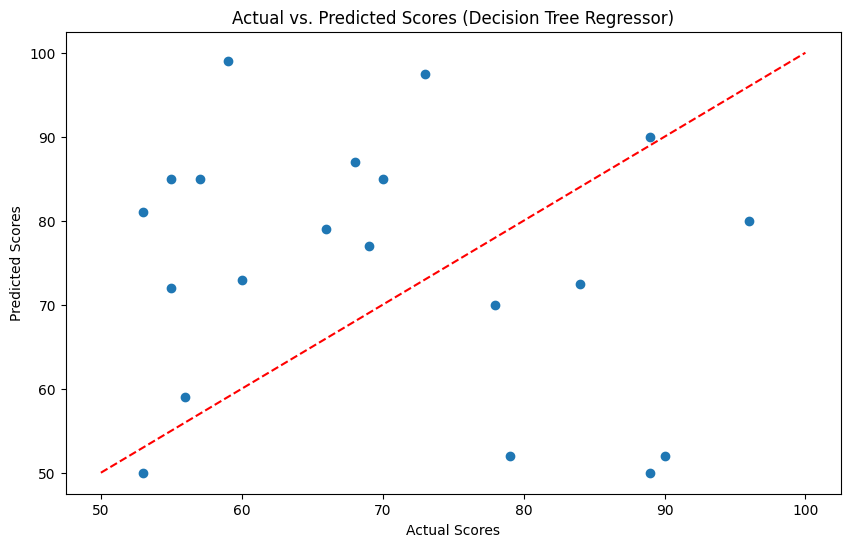

Random Forest Regressor - Mean Squared Error: 323.56
Random Forest Regressor - R-squared: -0.71


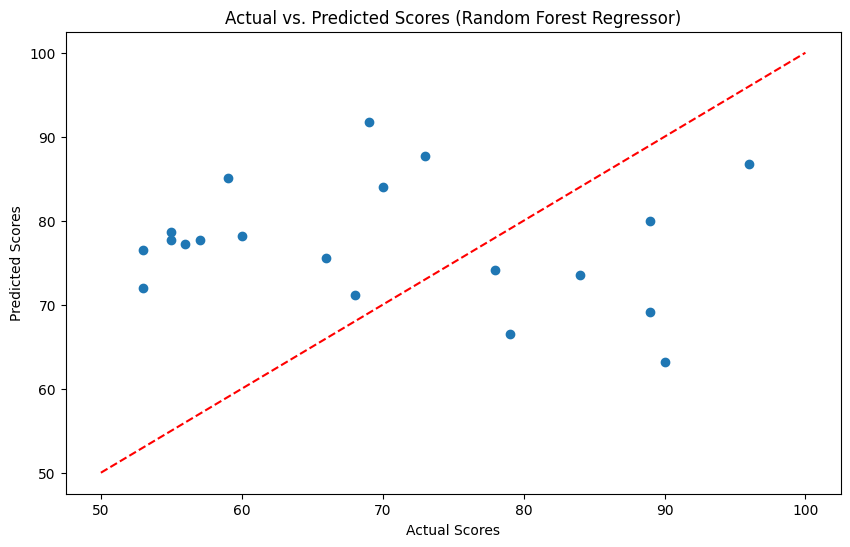

Support Vector Regressor - Mean Squared Error: 268.80
Support Vector Regressor - R-squared: -0.42


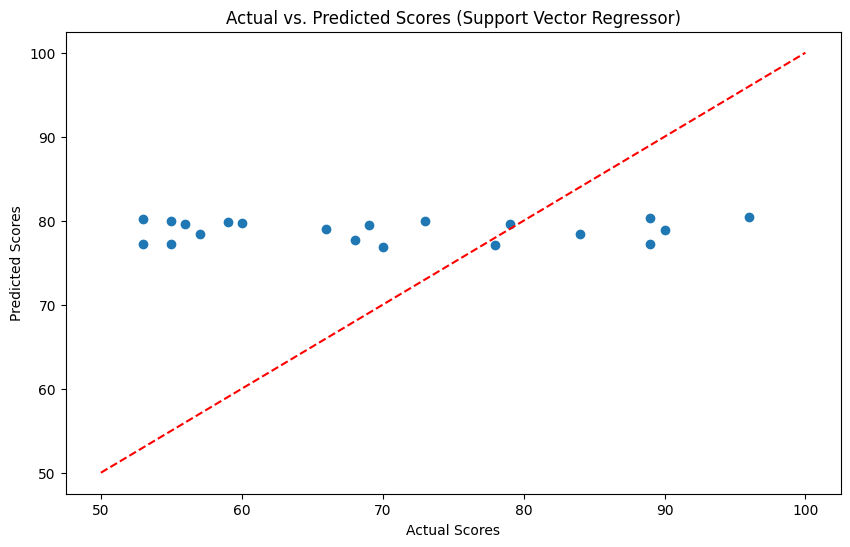

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Prepare the data for modeling
X = df[['hours_studied', 'previous_scores']]
y = df['current_score']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree Regressor': DecisionTreeRegressor(random_state=0),
    'Random Forest Regressor': RandomForestRegressor(random_state=0, n_estimators=100),
    'Support Vector Regressor': SVR(kernel='linear')
}

# Fit models, predict and evaluate
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f'{name} - Mean Squared Error: {mse:.2f}')
    print(f'{name} - R-squared: {r2:.2f}')

    # Plot the results
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred)
    plt.plot([50, 100], [50, 100], '--r')
    plt.xlabel('Actual Scores')
    plt.ylabel('Predicted Scores')
    plt.title(f'Actual vs. Predicted Scores ({name})')
    plt.show()